## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# check each data set and group to look for duplicates of Mouse ID
mouse_check_df = mouse_metadata.groupby(['Mouse ID'])['Mouse ID'].sum()
#print(mouse_check_df)
mouse_count=len(mouse_check_df)

print(mouse_count)
#no duplicate mouse IDs found in mouse_metadata.  249 unique mouse data entries  

#Total # of study results entries
study_len=len(study_results)

# Combine the data into a single dataset
combined_df=pd.merge(left=mouse_metadata, right=study_results, on="Mouse ID", how="outer")
combined_df


249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
mouse_count=combined_df.groupby(['Mouse ID'])
#print(mouse_count)

len(mouse_count.count())
#249 mouse entries(rows) same as mouse_metadata.  We have all mice accounted for and all studies in the same table.


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  Counting for each timepoint to reveal timepoint duplicates. 
mouse_id_tp=pd.DataFrame(combined_df.groupby(['Mouse ID','Timepoint'])['Timepoint'].count())
mouse_id_tp.head()
#checking for duplicate "timepoint and mouse id entries with for-loop"
for x in mouse_id_tp['Timepoint']:
    if x > 1:
        print(x)
           
# Returns 5 values above 1 so we havea total of 5 duplicate Mouse ID and Timepoints.  Need to figure out which ones

2
2
2
2
2


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
tp_dup_df=mouse_id_tp
tp_dup_df['TP Counts'] = combined_df.groupby(['Mouse ID','Timepoint'])['Timepoint'].count()
tp_dup_df=tp_dup_df.loc[tp_dup_df['TP Counts'] > 1]

#Will use to double check that all duplicate Mouse ID and Timepoint entries are removed from orginal entry list by count.  
tot_dup_count=len(tp_dup_df)

#Merge back with combined list
dup_combined_df=pd.merge(left=combined_df, right=tp_dup_df, on="Mouse ID", how="inner")
#len(dup_combined_df)
#Resulted with duplicates based on merge above, will remove duplicates to create data frame for duplicate mouse ID
dup_info_df=dup_combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint_x'], keep='first')


dup_info_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y,TP Counts
0,g989,Propriva,Female,21,26,0,45.000000,0,2,2
10,g989,Propriva,Female,21,26,5,48.786801,0,2,2
20,g989,Propriva,Female,21,26,10,51.745156,0,2,2
30,g989,Propriva,Female,21,26,15,51.325852,1,2,2
40,g989,Propriva,Female,21,26,20,55.326122,1,2,2
50,g989,Propriva,Female,21,26,25,56.045564,1,2,2
55,g989,Propriva,Female,21,26,30,59.082294,1,2,2
60,g989,Propriva,Female,21,26,35,62.570880,2,2,2


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Using drop duplicates to drop duplicated Mouse ID and Timepoint_x
cleaned_combined_df=combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_len=len(cleaned_combined_df['Mouse ID'])

#lenght we started from original merge of the lists, with duplicates subtracted
non_dup_len= (study_len) - (tot_dup_count)

#  Assert statement to check correct number entries in dataframe with no duplicates.
assert cleaned_len == non_dup_len

#cleaned_combined_df.to_csv('Cleaned Drug Data')  



## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_stat = cleaned_combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
drug_mean = pd.DataFrame(tumor_vol_stat.mean())

drug_median =tumor_vol_stat.median()
drug_var = tumor_vol_stat.var()
drug_std = tumor_vol_stat.std()
drug_sem = tumor_vol_stat.sem()



drug_mean["Median Tumor Volume"] = drug_median
drug_mean['Tumor Volume Variance']=drug_var
drug_mean['Tumor Volume STDev']=drug_std
drug_mean['Tumor Volume SEM'] = drug_sem
drug_mean.rename(columns={'Tumor Volume (mm3)': "Tumor Volume Mean"})

drug_mean
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Tumor Volume (mm3),Median Tumor Volume,Tumor Volume Variance,Tumor Volume STDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#drug_agg=cleaned_combined_df.groupby('Drug Regimen').agg(mean)
#drug_agg
#Use groupby.agg function
#cleaned_combined_df
# This method produces everything in a single groupby function.

## Bar Plots

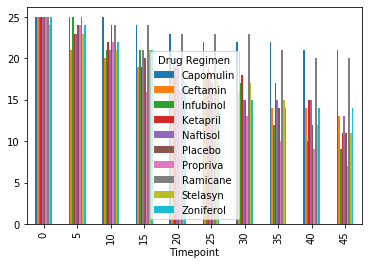

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas
#Generate copy of cleaned_combined for editting.
bar_pd_df = cleaned_combined_df
#Use pivot table instead of groupby
bar_pd_df = bar_pd_df.pivot_table(index = 'Timepoint', columns ='Drug Regimen',values ='Mouse ID'  ,aggfunc = 'count' )

#plot bar chart
ax = bar_pd_df.plot(kind = 'bar', rot=90)

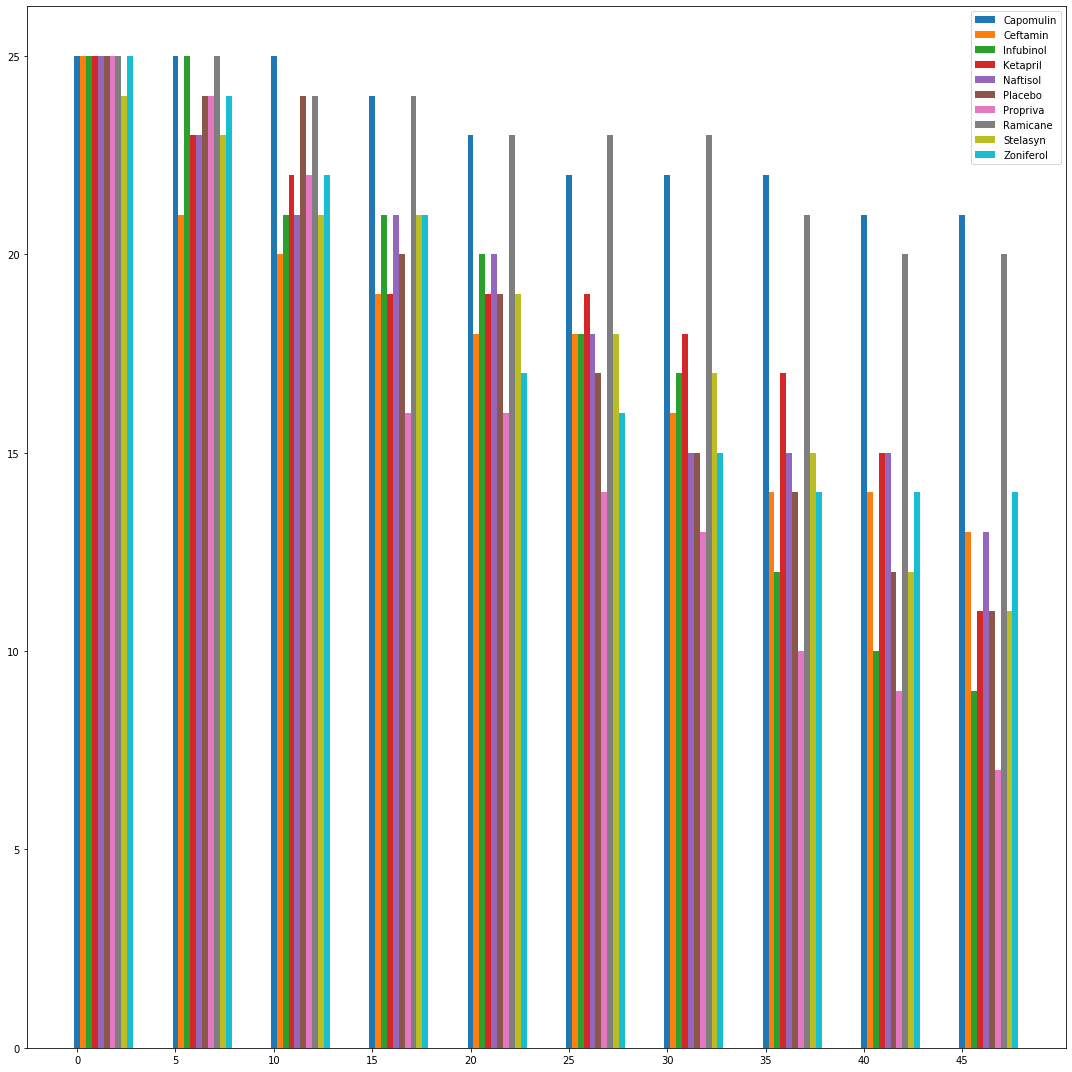

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#Create copy of cleaned_combined_df for editting using grouby instead of pivot table
bar_mp_df=cleaned_combined_df.groupby(["Timepoint", "Drug Regimen"])['Mouse ID'].count().reset_index()


fig, ax = plt.subplots(figsize=(15,15))
#create x axis for unique time plots
x=bar_mp_df['Timepoint'].unique()
x
#Define bar width for bar chart
bar_width = 0

#Insert for loop to loop through each unique Drug Regimen

for drug in bar_mp_df['Drug Regimen'].unique():
    b2 = ax.bar(x + bar_width, bar_mp_df.loc[bar_mp_df['Drug Regimen'] == drug, 'Mouse ID'], width=0.3)
    bar_width += .3
    plt.xticks(x)
fig.tight_layout()
# Create legeng for Drug Regimen's
ax.legend(bar_mp_df['Drug Regimen'])



## Pie Plots

In [ ]:
pie_pan_df=pd.DataFrame(cleaned_combined_df.groupby(['Sex','Mouse ID'])['Mouse ID'].unique())
pie_pan_df=pie_pan_df.pivot_table(index= 'Sex', values='Mouse ID', aggfunc='count')
pie_pan_df=pie_pan_df.reset_index()
pie_pan_df.head()


    


#sex=pie_pan_df['Sex']
#count=pie_pan_df['Mouse ID']

#new_df={'Sex':sex, 'Count':count}
#new_df=pd.Series(new_df)
#new_df=new_df.set_index('Sex')
#new_df
#pie_series = pd.Series(data=count, 
                   #index=sex, 
                   #name='Pie Series')

#pie_series


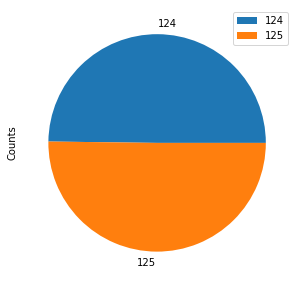

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#New data frame to overwrite, group by sex and mouse id, list unique mouse ID only

pie_pan_df=pd.DataFrame(cleaned_combined_df.groupby(['Sex','Mouse ID'])['Mouse ID'].unique())

pie_pan_df=pie_pan_df.pivot_table(index= 'Sex', values='Mouse ID', aggfunc='count')
pie_pan_df
#bar_pd_df = bar_pd_df.pivot_table(index = 'Timepoint', columns ='Drug Regimen',values ='Mouse ID'  ,aggfunc = 'count' )

##pie_pan_df=pd.DataFrame(cleaned_combined_df.groupby(['Sex','Mouse ID'])['Mouse ID'].unique())
#pie_pan_df=pie_pan_df.reset_index()
##pie_pan_df
#groupby sex and cout our unique mouse id
##pie_pan_df=pd.DataFrame(pie_pan_df.groupby('Sex')['Mouse ID'].count().reset_index())
#pie_pan_df['Count']=pie_pan_df['Mouse ID']

pie_pan_df['Counts']=pie_pan_df['Mouse ID']
pie_pan_df=pie_pan_df.reset_index()

pie_pan_df=pie_pan_df.set_index('Sex')
pie_pan_df
y=pie_pan_df['Counts']
labels=pie_pan_df['Counts']
ax=pie_pan_df.plot.pie(y='Counts', labels=labels, figsize=(5,5))




([<matplotlib.patches.Wedge at 0x1806d8b7d48>,
 [Text(-0.7123680187966352, -0.8381717042442776, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.3885643738890738, -0.4571845659514241, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

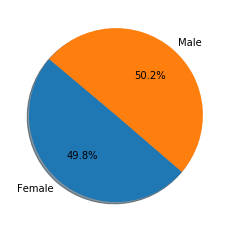

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_mat_df=pd.DataFrame(cleaned_combined_df.groupby(['Sex','Mouse ID'])['Mouse ID'].unique())
pie_mat_df=pie_mat_df.pivot_table(index= 'Sex', values='Mouse ID', aggfunc='count')
pie_mat_df=pie_mat_df.reset_index()

u=pie_mat_df['Sex'].unique()
u
c=pie_mat_df['Mouse ID'].unique()
c
plt.pie(c, labels=u,shadow=True,autopct="%1.1f%%", startangle=140)

## Quartiles, Outliers and Boxplots

In [17]:
cleaned_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_reg=pd.DataFrame(cleaned_combined_df.groupby('Mouse ID')['Drug Regimen'].unique())
drug_reg=drug_reg.reset_index()
final_tp=pd.DataFrame(cleaned_combined_df.groupby('Mouse ID')['Timepoint'].max())
final_time=pd.DataFrame(cleaned_combined_df.groupby(['Mouse ID', 'Tumor Volume (mm3)'])['Timepoint'].max())
final_time=final_time.reset_index()
final_tp=final_tp.reset_index()
final_tp
new_df=pd.merge(left=final_tp, right=final_time, how='left')
new_df
merge_drug=pd.merge(left=new_df, right=drug_reg, how='left')


#Calculate IQR
quartile=merge_drug['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lowerq = quartile[0.25]
upperq = quartile[0.75]
iqr = upperq-lowerq

#Added later for print statement to make clear table should be empty, no outliers
min_vol=merge_drug['Tumor Volume (mm3)'].min()
max_vol=merge_drug['Tumor Volume (mm3)'].max()
# set up bounds for outlier table.  Use 1.5*IQR value calculated above
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Tumor Volume Lower Bound is {lower_bound} and Minumum Tumore Volume (mm3) is {min_vol}")
print(f"Tumor Volume Upper Bound is {upper_bound} and Minumum Tumore Volume (mm3) is {max_vol}")
#print(f"Values below {lower_bound} could be outliers.")

#Create table of outliers
drug_out = merge_drug.loc[(merge_drug['Tumor Volume (mm3)'] < lower_bound) | (merge_drug['Tumor Volume (mm3)'] > upper_bound)]
drug_out




Tumor Volume Lower Bound is 17.400437649999986 and Minumum Tumore Volume (mm3) is 22.05012627
Tumor Volume Upper Bound is 93.49183637000002 and Minumum Tumore Volume (mm3) is 78.56701362


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen


In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
av_tum=merge_drug.groupby(['Drug Regimen']).mean()


#tumor_vol_stat = cleaned_combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
#drug_mean = pd.DataFrame(tumor_vol_stat.mean())

#df.groupby('A')['B'].mean()
#df.groupby(['A', 'B']).mean()

TypeError: unhashable type: 'numpy.ndarray'

## Line and Scatter Plots

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df=cleaned_combined_df['Drug Regimen']='Capomulin'
cad_df

C:\Users\Pete\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


NameError: name 'cad_df' is not defined

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
